<a href="https://colab.research.google.com/github/innogatchi/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 30 images of your self (selfied are recommended) in the Train folder
- Upload 30 images of your partner in the Train folder
- Upload 10 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [146]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [147]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display one raw image directly from your drive

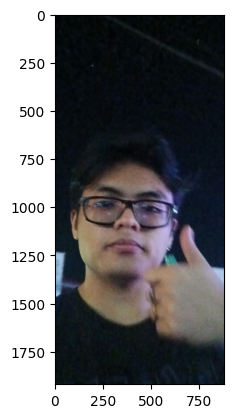

In [149]:
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()

displayImage('/content/drive/My Drive/Images/Train/You/f25fa70c-76cf-49d5-a66d-542046e7f8ddphoto.jpeg')

## Load the images from your drive and apply preprocessing to your raw images

In [150]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)

            # Check if the file exists before attempting to read it
            if not os.path.exists(img_path):
                print(f"Warning: File not found: {img_path}")
                continue

            img = cv2.imread(img_path)

            # Check if the image was loaded successfully
            if img is None:
                print(f"Warning: Failed to load image: {img_path}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [151]:
images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')

## Display one pre-processed image from the training set

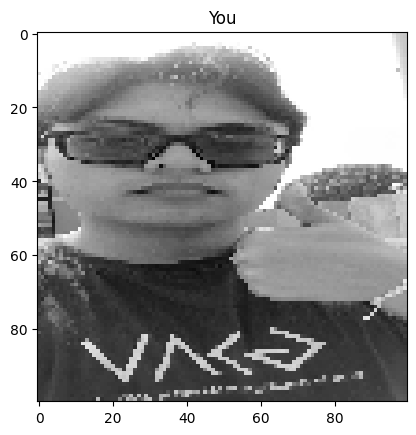

In [152]:
# Get a sample image and its corresponding name
image = images[0].reshape(100,100)  # Access the first image
name = labels[0]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()

## Display ten pre-processed images from the training set

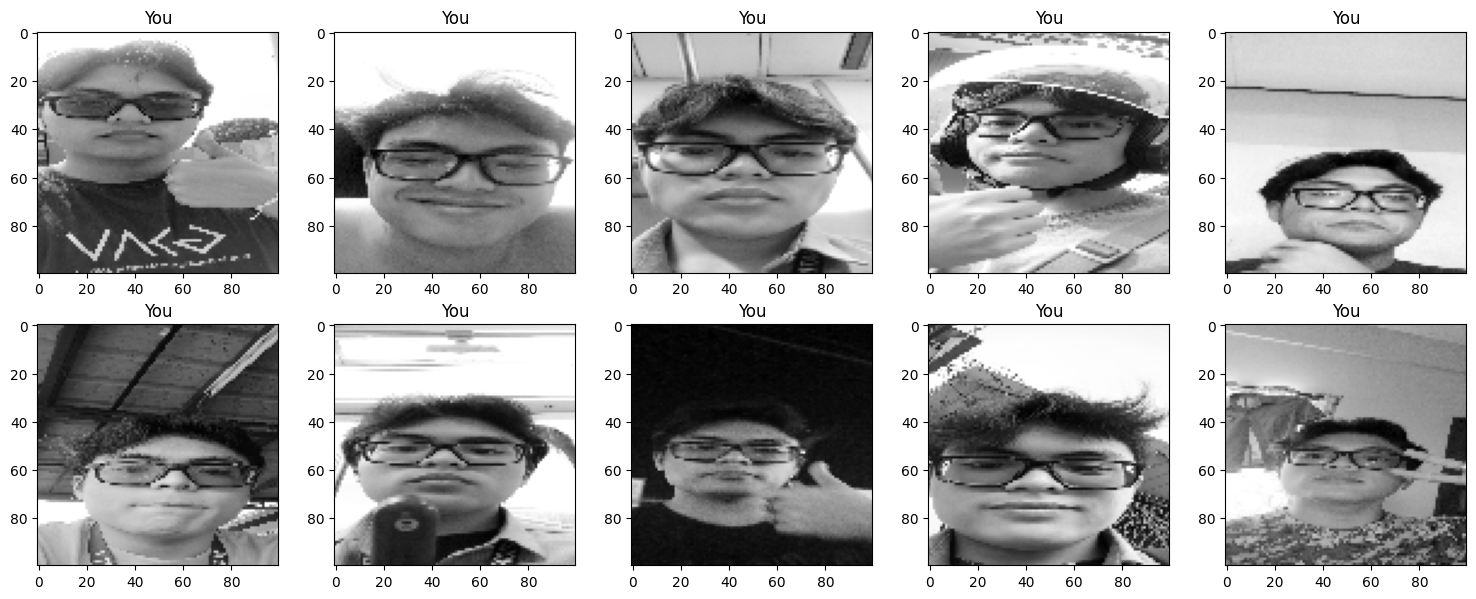

In [153]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

## Split your data

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Train your SVM model

In [155]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

## Evaluate your model

In [156]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


## Test your model using images not in your training set

Test one image of yourself

In [157]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

Image: 3f6d254a-0904-4054-82e2-c3500e3b1716photo.jpeg, Predicted label: You


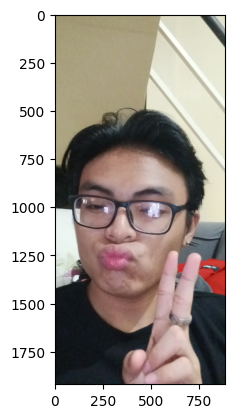

Image: TEST 1.JPG, Predicted label: Aaron


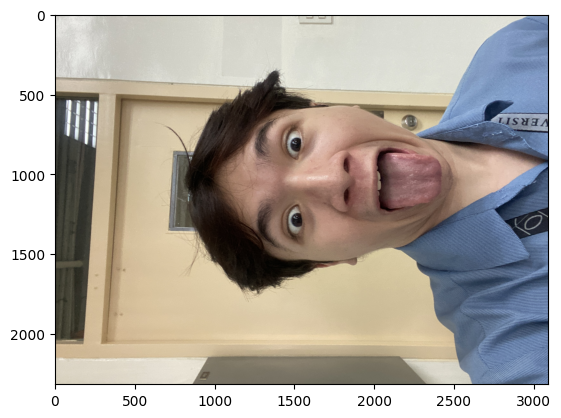

Image: Image.jpg, Predicted label: James


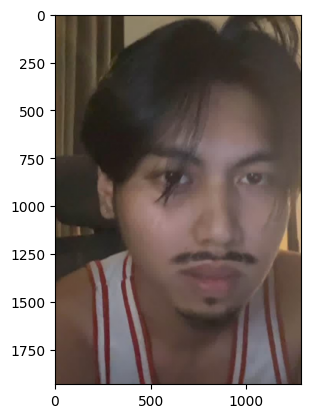

Image: ce80a669-168b-4a22-bbb6-58df334366a7photo.jpeg, Predicted label: You


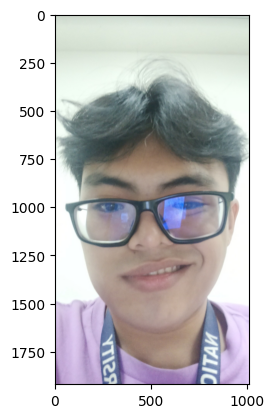

Image: 09447b25-4269-421c-b78d-d12b877dbcb1photo.jpeg, Predicted label: You


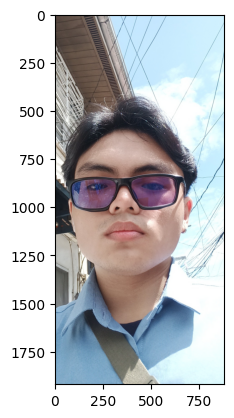

Image: 8b75e06a-0bbd-4a5a-9ad5-9f37c8625284photo.jpeg, Predicted label: You


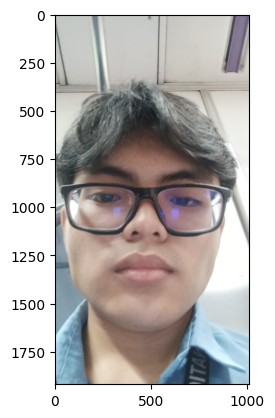

Image: be438744-b425-4982-8f43-9e3f903fb7edphoto.jpeg, Predicted label: You


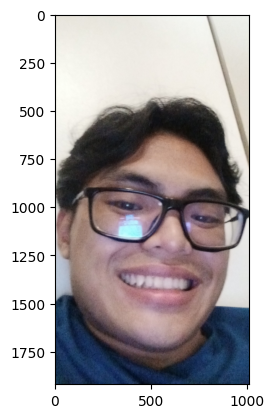

Image: 5bbad083-ed26-453a-bbb8-65bb26499e00photo.jpeg, Predicted label: You


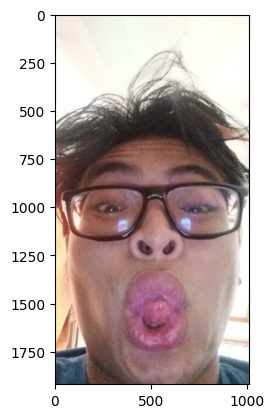

Image: 16ba0a1d-c3eb-4060-baee-138f2e7cb6d1photo.jpeg, Predicted label: You


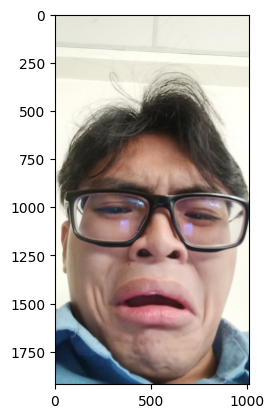

Image: 6ef48f9a-6e1f-4268-84c8-3e09fd1a3747photo.jpeg, Predicted label: You


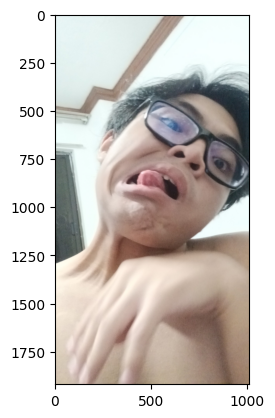

In [158]:
def predict_images_in_folder(folder_path, model):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        # Check if it's a file (not a subdirectory)
        if os.path.isfile(img_path):
            result = predict_image(img_path, model)  # Assuming predict_image function is defined
            print(f'Image: {filename}, Predicted label: {result[0]}')  # result[0] to get the label
            displayImage(img_path)  # Assuming displayImage function is defined

# Call the function to predict on images in the Test folder
predict_images_in_folder('/content/drive/My Drive/Images/Test', model)

Test one image of your partner